In [1]:
#Script for plotting figures for article 
#"A new parameterisation for homogeneous ice nucleation driven by highly variable dynamical forcings"

import matplotlib.pyplot as plt
import numpy as np
from numpy import *

In [2]:
#generalized version to read data from the .dat files generated by parcel model
def read_data_dat(file_name):
    yr = []
    tr = []
    vr = []
    qq = []

    with open(file_name) as f:
        for line in f:
            line = line.strip().split()
            tr.append(float(line[0]))
            yr.append(float(line[1]))
            vr.append(float(line[2]))
            qq.append(float(line[3]))
    return [tr, yr, vr, qq]

In [3]:
# loading the data for two cases of the parcel model calculations
data_path = "../partcel_mod_dat/" #change the path to the data if needed

#TC1
# test_ft_vm_old_fs
data_TC1 = read_data_dat(data_path+'VM_RS_1e2_tc5.dat') #IC: n_init = 1e2
#TC2
# test_ft_vm_old_fs1e6
data_TC2 = read_data_dat(data_path+'VM_RS_1e6_tc5.dat') #IC: n_init = 1e6

# find a time of the nucleation event for S=Sc=1.5
t0_TC1 =np.where(np.array(data_TC1[2][:])>1.5)
t0_TC2 = np.where(np.array(data_TC2[2][:])>1.5)


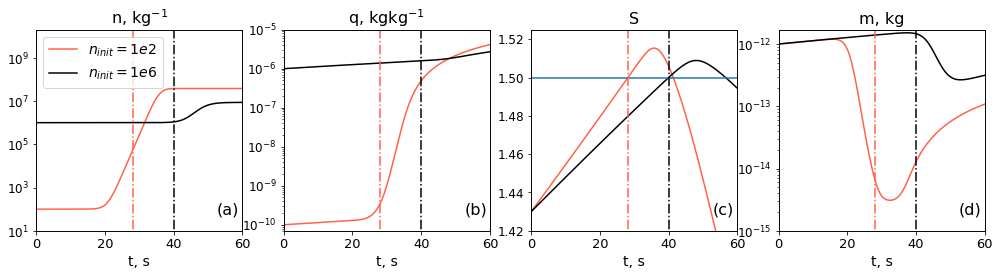

In [16]:
#Fig 1

# font size & arguments/styles for the plots
fs = 16
TC1_args = dict( color='tomato',linestyle ='-', linewidth=1.5, label='$n_{init}=1e2$')
TC2_args = dict(color='black',linestyle ='-', linewidth=1.5, label='$n_{init}=1e6$')

# plot
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(17, 3.7))
# ice number concentration
ax[0].plot(np.array(data_TC1[0][:]), np.array(data_TC1[1][:]), **TC1_args)
ax[0].plot(np.array(data_TC2[0][:]), np.array(data_TC2[1][:]), **TC2_args)
ax[0].set(xlim = (0,60),yscale ='log')
ax[0].set(ylim = (1e1,2e10))
ax[0].legend(loc='upper left', fontsize=14)

# ice mixing ratio
ax[1].plot(np.array(data_TC1[0][:]), np.array(data_TC1[3][:]),**TC1_args)
ax[1].plot(np.array(data_TC2[0][:]), np.array(data_TC2[3][:]), **TC2_args)
ax[1].set(xlim = (0,60),yscale ='log')
ax[1].set(ylim = (0.7e-10,1e-5))

# satiration ratio over ice
ax[2].plot(np.array(data_TC1[0][:]), np.array(data_TC1[2][:]), **TC1_args)
ax[2].plot(np.array(data_TC2[0][:]), np.array(data_TC2[2][:]), **TC2_args)
ax[2].set(xlim = (0,60))
ax[2].plot([0,20,60],[1.5,1.5,1.5])
ax[2].set(ylim = (1.42,1.525))

# mean mass of ice crystals
ax[3].plot(np.array(data_TC1[0][:]), np.array(data_TC1[3][:])/np.array(data_TC1[1][:]),**TC1_args)
ax[3].plot(np.array(data_TC2[0][:]), np.array(data_TC2[3][:])/np.array(data_TC2[1][:]), **TC2_args)
ax[3].set(ylim=(1e-15,1.7e-12))
ax[3].set(yscale = "log")

for axs in ax.flat:
    axs.xaxis.set_tick_params(labelsize=fs-3)
    axs.yaxis.set_tick_params(labelsize=fs-4)
    axs.set(xlim = (0,60))
    axs.set_xlabel('t, s',fontsize = 14)
    
#     plot lines indication time of the nucleation event
    axs.plot([data_TC1[0][t0_TC1[0][0]],data_TC1[0][t0_TC1[0][0]]],[0,3e10],ls = '-.',color = "tomato")
    axs.plot([data_TC2[0][t0_TC2[0][0]],data_TC2[0][t0_TC2[0][0]]],[0,3e10],ls = '-.',color = "black")
    
    
ax1= ['','','','']
ax1_names= ['(a)','(b)','(c)','(d)']
for i in range(0,4):
    ax1[i]=ax[i].twiny()
    ax1[i].set_xlabel(ax1_names[i],fontsize = fs)
    ax1[i].set_xticks([])
    ax1[i].xaxis.set_label_coords(0.93,0.08)
# titles for plots
ax[0].set_title('n, kg$^{-1}$',fontsize=fs)
ax[1].set_title('q, kgkg$^{-1}$',fontsize=fs)
ax[2].set_title('S',fontsize=fs)
ax[3].set_title('m, kg',fontsize=fs)

plt.savefig('output/f01.png',bbox_inches='tight',dpi=300)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


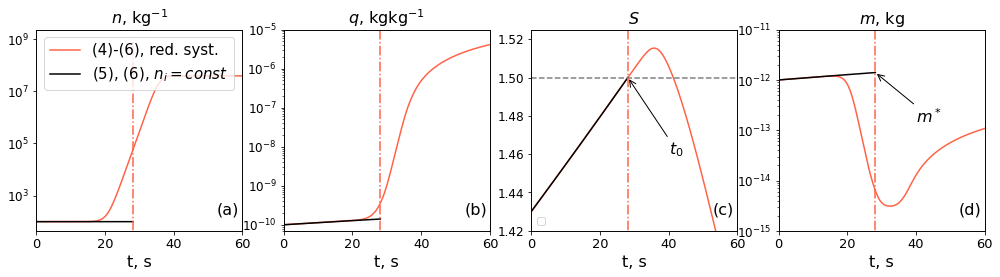

In [17]:
#Fig 2

# load data for Fig.2, solution of the full system and (S,qi) equations with n=const
dat_reduced_syst = read_data_dat(data_path+'VM_RS_1e2_tc5.dat') # only calculation of S, qi (5), (6)
dat_full_syst = read_data_dat(data_path+'VM_par_1e2_tc5_new.dat') #system (4)-(6)

rs_args = dict(color='tomato',linestyle ='-', linewidth=1.5, label='(4)-(6), red. syst.')
fs_args = dict( color='black',linestyle ='-', linewidth=1.5, label='(5), (6), $n_i=const$')

t0_fs = np.where(np.array(dat_full_syst[2][:])>1.5)

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(17, 3.7))
xmax = 60
for axs in ax:
    axs.set_xlim(0,xmax)
    axs.set_xlabel('t, s',fontsize = fs)
ax[2].set_title('$S$',fontsize = fs)
ax[2].legend(loc='lower left', fontsize=11)
ax[2].plot(np.array(dat_reduced_syst[0][:]), np.array(dat_reduced_syst[2][:]), **rs_args)
ax[2].plot(np.array(dat_full_syst[0][0:t0_fs[0][0]]), np.array(dat_full_syst[2][0:t0_fs[0][0]]), **fs_args)
ax[2].plot([0,60],[1.5,1.5],ls ='--',color ='gray')
ax[2].annotate('$t_0$', xy=(28.13, 1.5), xytext=(40, 1.46),fontsize =fs,
            arrowprops=dict(arrowstyle="->"))
ax[2].set(ylim = (1.42,1.525))


ax[0].plot(np.array(dat_reduced_syst[0][:]), np.array(dat_reduced_syst[1][:]), **rs_args)
ax[0].plot(np.array(dat_full_syst[0][0:t0_fs[0][0]]), np.array(dat_full_syst[1][0:t0_fs[0][0]]), **fs_args)
ax[0].set(xlim = (0,60),yscale ='log')
ax[0].set_title('$n$, kg$^{-1}$',fontsize = fs)


ax[1].set_yscale("log")
ax[1].plot(np.array(dat_reduced_syst[0][:]), np.array(dat_reduced_syst[3][:]), **rs_args)
ax[1].plot(np.array(dat_full_syst[0][0:t0_fs[0][0]]), np.array(dat_full_syst[3][0:t0_fs[0][0]]), **fs_args)
ax[1].set(ylim = (0.7e-10,1e-5))
ax[1].set_title('$q$, kgkg$^{-1}$',fontsize = fs)

ax[3].plot(np.array(dat_reduced_syst[0][:]), np.array(dat_reduced_syst[3][:])/np.array(dat_reduced_syst[1][:]),
           **rs_args)
ax[3].plot(np.array(dat_full_syst[0][0:t0_fs[0][0]]), 
           np.array(dat_full_syst[3][0:t0_fs[0][0]])/np.array(dat_full_syst[1][0:t0_fs[0][0]]),**fs_args)
ax[3].set_yscale("log")
ax[3].set_title('$m$, kg',fontsize = fs)
ax[3].set(ylim = (1e-15,1e-11),yscale = 'log')
ax[3].annotate('$m^*$', xy=(28.13, 1.40387139e-12), xytext=(40, 1.40387139e-13),fontsize =fs,
            arrowprops=dict(arrowstyle="->"))
for axs in ax:
    axs.xaxis.set_tick_params(labelsize=fs-3)
    axs.yaxis.set_tick_params(labelsize=fs-4)
    
    axs.set(xlim = (0,60))
    axs.plot([dat_reduced_syst[0][t0_fs[0][0]],dat_reduced_syst[0][t0_fs[0][0]]],[0,1e9],ls = '-.',color = "tomato")
ax1= ['','','','']
ax1_names= ['(a)','(b)','(c)','(d)']
for i in range(0,4):
    ax1[i]=ax[i].twiny()
    ax1[i].set_xlabel(ax1_names[i],fontsize = fs)
    ax1[i].set_xticks([])
    ax1[i].xaxis.set_label_coords(0.93,0.08)
ax[0].legend(loc='upper left', fontsize=15)
#n q s m
plt.savefig('output/f02.png',bbox_inches='tight',dpi=300)
plt.show()

In [18]:
# function to process necessary variables from the data set from ensamble calculations
def append_data(filepath, ngw):
#     load data 
    d = np.loadtxt(filepath, unpack=True)
    
#     add variables from the current data set to the array
    Mreal_joined.append(d[3 + 3 * ngw + 4, :])
    Ninit_joined.append(d[0, :])
    Npost_joined.append(d[3 + 3 * ngw + 2, :])
    Ft0_joined.append(d[3 + 3 * ngw + 1, :])
    mstar_joined.append(d[3 + 3 * ngw + 3, :])
    t0_joined.append(d[3 + 3 * ngw, :])
    Qinit_joined.append(d[2, :])
    mom_flux_joined.append(d[-1, :])
    Qi0_fs.append(d[3 + 3 * ngw + 5, :])
    print("file:", filepath, " with length: ",len(d[3 + 3 * ngw + 4, :]), " processed \n")


In [19]:
# Initialize joined arrays
Mreal_joined = []
Ninit_joined = []
Qinit_joined = []
Ft0_joined = []
Npost_joined = []
mstar_joined = []
t0_joined = []
Qi0_fs = []
mom_flux_joined = []

# List of file paths
datasets = [
    (data_path+"VM_dataset_out_msgwambased_fs_1GW_Nfull.dat",1),
    (data_path+"VM_dataset_out_msgwambased_valid_setup1GWw00_Ft0formS.dat",1),
    (data_path+"VM_dataset_out_msgwambased_fs_w00.dat",1),
    (data_path+"VM_dataset_out_msgwambased_fs_2GWw00.dat",2),
    (data_path+"VM_dataset_out_msgwambased_fs_2GW.dat",2),
    (data_path+"VM_dataset_out_msgwambased_fs_5GWw00.dat",5),
    (data_path+"VM_dataset_out_msgwambased_fs_5GW.dat",5),
    (data_path+"VM_dataset_out_msgwambased_fs_10GW.dat",10),
    (data_path+"VM_dataset_out_msgwambased_fs_10GWw00.dat",10)
]

# Process files and collect Npost arrays if needed
Npost_values = []
for filepath, ngw in datasets:
    Npost_value = append_data(filepath, ngw)   
    Npost_values.append(Npost_value)
    
    
# Convert lists to numpy arrays if needed
Mreal_joined = np.concatenate(Mreal_joined)
Ninit_joined = np.concatenate(Ninit_joined)
Npost_joined = np.concatenate(Npost_joined)
Ft0_joined = np.concatenate(Ft0_joined)
mstar_joined = np.concatenate(mstar_joined)
t0_joined = np.concatenate(t0_joined)
Qinit_joined = np.concatenate(Qinit_joined)
mom_flux_joined = np.concatenate(mom_flux_joined)
Qi0_fs = np.concatenate(Qi0_fs)
    
# process 1 more data set with special selection of cases with relatively fast nucleation event
d = [] 
d = loadtxt(data_path+"VM_dataset_out_msgwambased_fs_lowerNpost5gww00.dat",unpack = True)
ngw =5

d_select =np.where(d[3+3*ngw,:]<2000)
t0_joined= np.append(t0_joined, d[3+3*ngw,d_select])
Mreal_joined = np.append(Mreal_joined,d[3+3*ngw+4,d_select])
Ninit_joined = np.append(Ninit_joined, d[0,d_select])
Npost_joined= np.append(Npost_joined, d[3+3*ngw+2,d_select])
Ft0_joined= np.append(Ft0_joined, d[3+3*ngw+1,d_select])
mstar_joined= np.append(mstar_joined, d[3+3*ngw+3,d_select])
Qinit_joined = np.append(Qinit_joined,d[2,d_select])
mom_flux_joined = np.append(mom_flux_joined,d[-1,d_select])
Qi0_fs = np.append(Qi0_fs,d[3+3*ngw+5,d_select])


d = [] 
d = loadtxt(data_path+"VM_dataset_out_verification_6GWw00_fs.dat",unpack = True)
ngw =6

d_select =np.where(d[3+3*ngw,:]<2000)
t0_joined= np.append(t0_joined, d[3+3*ngw,d_select])
Mreal_joined = np.append(Mreal_joined,d[3+3*ngw+4,d_select])
Ninit_joined = np.append(Ninit_joined, d[0,d_select])
Npost_joined= np.append(Npost_joined, d[3+3*ngw+2,d_select])
Ft0_joined= np.append(Ft0_joined, d[3+3*ngw+1,d_select])
mstar_joined= np.append(mstar_joined, d[3+3*ngw+3,d_select])


Qinit_joined = np.append(Qinit_joined,d[2,d_select])
mom_flux_joined = np.append(mom_flux_joined,d[-1,d_select])
Qi0_fs = np.append(Qi0_fs,d[3+3*ngw+5,d_select])


file: ../partcel_mod_dat/VM_dataset_out_msgwambased_fs_1GW_Nfull.dat  with length:  646  processed 

file: ../partcel_mod_dat/VM_dataset_out_msgwambased_valid_setup1GWw00_Ft0formS.dat  with length:  15498  processed 

file: ../partcel_mod_dat/VM_dataset_out_msgwambased_fs_w00.dat  with length:  826  processed 

file: ../partcel_mod_dat/VM_dataset_out_msgwambased_fs_2GWw00.dat  with length:  331  processed 

file: ../partcel_mod_dat/VM_dataset_out_msgwambased_fs_2GW.dat  with length:  138  processed 

file: ../partcel_mod_dat/VM_dataset_out_msgwambased_fs_5GWw00.dat  with length:  662  processed 

file: ../partcel_mod_dat/VM_dataset_out_msgwambased_fs_5GW.dat  with length:  19  processed 

file: ../partcel_mod_dat/VM_dataset_out_msgwambased_fs_10GW.dat  with length:  20  processed 

file: ../partcel_mod_dat/VM_dataset_out_msgwambased_fs_10GWw00.dat  with length:  1148  processed 



In [20]:
# Add filetered data for fixed n_init = 1e3, F(t0) = 0.0003
deln = 3e1
delF = 0.000005
target_nin = 1e3
target_Ft0 = 0.0003
n_filter = np.where((Ninit_joined>target_nin-deln) & (Ninit_joined <target_nin+deln) )
F_filter = np.where((Ft0_joined>(target_Ft0-delF))&(Ft0_joined<(target_Ft0+delF)))

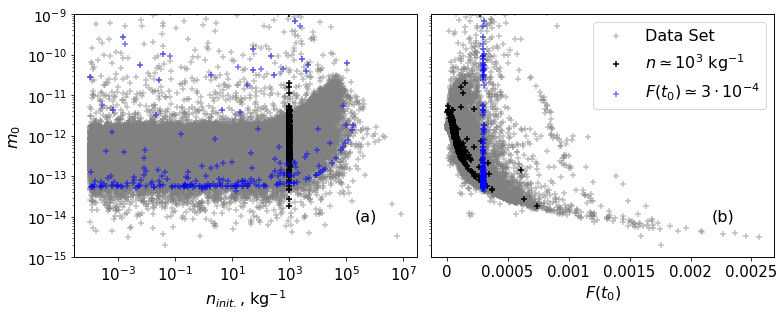

In [37]:
#Fig 4
# data set and illistration of the m0 dependence on n_in, F(t0) 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4.5), tight_layout=True)
ax[0].scatter(Ninit_joined[np.where((t0_joined<1500))],Mreal_joined[np.where((t0_joined<1500))],marker = '+',color = 'gray',label = 'data', alpha = 0.5)
ax[0].scatter(Ninit_joined[n_filter],Mreal_joined[n_filter],marker = '+',color = 'black')
ax[0].scatter(Ninit_joined[F_filter],Mreal_joined[F_filter],marker = '+',color = 'blue',alpha = 0.55)
ax[0].set(ylim = (1e-15,1e-9))
ax[0].set(yscale = 'log',xscale = 'log')
ax[0].set_ylabel(r'$m_0$',fontsize=fs)
ax[0].set_xlabel(r'$n_{init.}$, kg$^{-1}$',fontsize=fs)
ax[1].set_xlabel(r'$F(t_0)$',fontsize=fs)
ax[1].scatter(Ft0_joined[np.where((t0_joined<1500))],Mreal_joined[np.where((t0_joined<1500))],marker = '+',color = 'gray',label = 'Data Set', alpha = 0.5)
ax[1].scatter(Ft0_joined[n_filter],Mreal_joined[n_filter],marker = '+',color = 'black',label = '$n \simeq 10^3$ kg$^{-1}$')
ax[1].scatter(Ft0_joined[F_filter],Mreal_joined[F_filter],marker = '+',color = 'blue',alpha = 0.55,label = '$F(t_0) \simeq 3\cdot 10^{-4}$')
ax[1].set(ylim = (1e-15,1e-9))


for axs in ax.flat:
    axs.xaxis.set_tick_params(labelsize=fs-1)
    axs.yaxis.set_tick_params(labelsize=fs-2)
    axs.set(yscale = 'log')
ax[1].set_yticklabels(labels=[])
ax[1].set_yticks([])
ax[1].set_xticks([0, 0.0005, 0.001, 0.0015, 0.002, 0.0025])
ax[1].set_xticklabels([0, 0.0005, 0.001, 0.0015, 0.002, 0.0025])
ax[1].legend(loc = "upper right",fontsize = fs)
x1= ['','']
ax1_names= ['(a)','(b)']
for i in range(0,2):
    ax1[i]=ax[i].twiny()
    ax1[i].set_xlabel(ax1_names[i],fontsize = fs)
    ax1[i].set_xticks([])
    ax1[i].xaxis.set_label_coords(0.85,0.15)

plt.savefig('output/f04.png',bbox_inches='tight',dpi=300)
plt.show()

In [43]:
# plots for simple data set 
# section 3.1

# new independent data set is used
# load the data 
Mreal_joined = []
Ninit_joined =[]
Qinit_joined = []
Ft0_joined = []
Npost_joined = []
mstar_joined =[]
t0_joined = []
Qi0_fs = []
mom_flux_joined = []

datasets = [
#     ("../partcel_mod_dat/VM_dataset_out_verification_6GWw00_fs.dat",6),
    (data_path+"VM_dataset_out_dataset_3GW_fs.dat",3),
    (data_path+"VM_dataset_out_dataset_3GWw00_fs.dat",3),
    (data_path+"VM_dataset_out_dataset_8GW_fs.dat",8),
    (data_path+"VM_dataset_out_dataset_8GWw00_fs.dat",8),
    (data_path+"VM_dataset_out_dataset_14GW_fs.dat",14),
    (data_path+"VM_dataset_out_dataset_14GWw00_fs.dat",14)
]

# Process files and collect Npost arrays if needed
Npost_values = []
for filepath, ngw in datasets:
    Npost_value = append_data(filepath, ngw)   
    Npost_values.append(Npost_value)
    
    
# Convert lists to numpy arrays if needed
Mreal_joined = np.concatenate(Mreal_joined)
Ninit_joined = np.concatenate(Ninit_joined)
Npost_joined = np.concatenate(Npost_joined)
Ft0_joined = np.concatenate(Ft0_joined)
mstar_joined = np.concatenate(mstar_joined)
t0_joined = np.concatenate(t0_joined)
Qinit_joined = np.concatenate(Qinit_joined)
mom_flux_joined = np.concatenate(mom_flux_joined)
Qi0_fs = np.concatenate(Qi0_fs)


d = loadtxt(data_path+'VM_dataset_out_verification_6GWw00_fs.dat', unpack = True)
ngw =6

Mreal_joined = np.append(Mreal_joined,d[3+3*ngw+4,0:3000])
Ninit_joined = np.append(Ninit_joined,  d[0,0:3000])
Npost_joined= np.append(Npost_joined,d[3+3*ngw+2,0:3000])
Ft0_joined= np.append(Ft0_joined,  d[3+3*ngw+1,0:3000])
Qi0_fs = np.append(Qi0_fs,d[3+3*ngw+6,0:3000])
mstar_joined= np.append(mstar_joined,  d[3+3*ngw+3,0:3000])

Mreal_joined_test = (Mreal_joined)
Ninit_joined_test = (Ninit_joined)
Npost_joined_test = (Npost_joined)
Ft0_joined_test = (Ft0_joined)
mstar_joined_test = (mstar_joined)
t0_joined_test = (t0_joined)
Qinit_joined_test = (Qinit_joined)
mom_flux_joined_test = (mom_flux_joined)
Qi0_fs_test = (Qi0_fs)



file: ../partcel_mod_dat/VM_dataset_out_dataset_3GW_fs.dat  with length:  79  processed 

file: ../partcel_mod_dat/VM_dataset_out_dataset_3GWw00_fs.dat  with length:  76  processed 

file: ../partcel_mod_dat/VM_dataset_out_dataset_8GW_fs.dat  with length:  74  processed 

file: ../partcel_mod_dat/VM_dataset_out_dataset_8GWw00_fs.dat  with length:  95  processed 

file: ../partcel_mod_dat/VM_dataset_out_dataset_14GW_fs.dat  with length:  76  processed 

file: ../partcel_mod_dat/VM_dataset_out_dataset_14GWw00_fs.dat  with length:  90  processed 



In [44]:
# function for m0 fit derived from the data set
def new_simple_fit_13(Nin, Ft0):
    a1, a2, a3, a4 = -25.325647262283194, -74.5502113819399, 0.08935198805596141, -2.9198249274795298e-05
    return  np.exp(a1  + a2* Ft0**(1/3)   + a3 *Nin**(1/3) + a4*Nin*Ft0**(1/3))

# function for calculation of the pos-nucleation number concentration based on the extended fit with m0 correction from the above
def N_post_check(n_ic,Ft0,m0_aprox):
    # defining constants 
    Sc = 1.5 #critical saturation ratio
    CMC = 4.3*1e-8 
    eps0 = 0.62
    D = CMC/eps0*210 #deposition coefficient multiplied by temperature
    
    NN_apr =2*Ft0 *Sc/D/(m0_aprox)**(1/3)/(Sc-1)-n_ic  
    return (NN_apr)

# function for calculation of the relative error of the data
def difference_in_2(dat1,dat_main,Ncase1, Ncase_main):
    delt = []

    for j in range(0,len(Ncase1)):
        for i in range(0,len(Ncase_main)):
            if ((Ncase1[j] == Ncase_main[i]) & (dat_main[i]>0)):
                delt.append(abs(dat1[j]-dat_main[i])/dat_main[i]*100)
    return delt


#calculate number of bins usig the Freedman–Diaconis rule
def number_of_bins_FD(dat):
    n_points =len(dat)
    dbin = 2* (np.percentile(dat,75)-np.percentile(dat,25))/(n_points)**(1/3)
    delt = max(dat)-min(dat)
    return int(delt/dbin)


In [45]:
# calculate m0 according to the choosen fit
simple_test = new_simple_fit_13(Ninit_joined_test, Ft0_joined_test)

# calculate N_post using extended parametrisation
n_post_test = N_post_check(Ninit_joined_test, Ft0_joined_test,simple_test)


# Calculation of the deviations of the m0, Npost predictions from the exact data 
deltaM = abs(simple_test-Mreal_joined_test)/Mreal_joined_test*100
deltaNpost = abs(n_post_test-Npost_joined_test)/Npost_joined_test*100

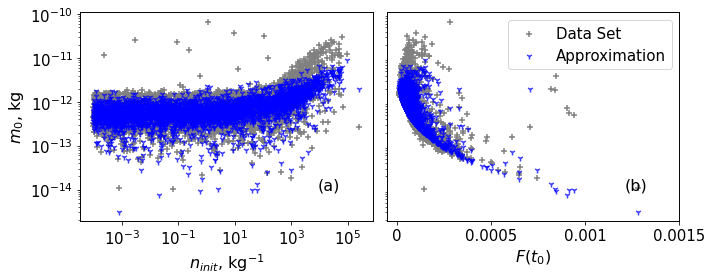

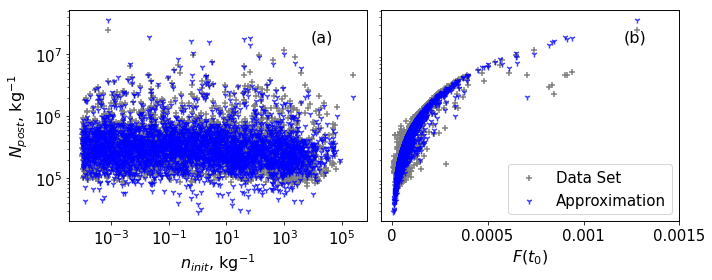

In [49]:
# plot Figs 5,6
ds_args = dict(marker = '+',color = 'gray',label = 'Data Set')
apr_args = dict(marker = '1',color = 'blue',label = 'Approximation',alpha = 0.75)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4),tight_layout=True)
ax[0].scatter(Ninit_joined_test,Mreal_joined_test,**ds_args)
ax[0].scatter(Ninit_joined_test,simple_test,**apr_args)
ax[0].set(yscale = 'log',xscale = 'log')
ax[1].scatter(Ft0_joined_test,Mreal_joined_test,**ds_args)
ax[1].scatter(Ft0_joined_test,simple_test,**apr_args)
ax[1].legend(loc = 'upper right',fontsize = 15)
ax[1].set(yscale = 'log')
for axs in ax:
    axs.xaxis.set_tick_params(labelsize=fs-1)
    axs.yaxis.set_tick_params(labelsize=fs-1)
ax[0].set_xlabel(r'$n_{init}$, kg$^{-1}$',fontsize = fs)
ax[1].set_xlabel(r'$F(t_0)$',fontsize = fs)
ax[0].set_ylabel(r'$m_{0}$, kg',fontsize = fs)

ax[1].set_yticklabels(labels=[])
ax[1].set_yticks([])
ax[1].set_xticks([0, 0.0005, 0.001, 0.0015])
ax[1].set_xticklabels([0, 0.0005, 0.001, 0.0015])
x1= ['','']
ax1_names= ['(a)','(b)']
for i in range(0,2):
    ax1[i]=ax[i].twiny()
    ax1[i].set_xlabel(ax1_names[i],fontsize = fs)
    ax1[i].set_xticks([])
    ax1[i].xaxis.set_label_coords(0.85,0.15)
plt.savefig('output/f05.png',bbox_inches='tight',dpi=300)
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4),tight_layout=True)
ax[0].scatter(Ninit_joined_test,Npost_joined_test,**ds_args)
ax[0].scatter(Ninit_joined_test,n_post_test,**apr_args)

ax[0].set(yscale = 'log',xscale = 'log')

ax[1].scatter(Ft0_joined_test,Npost_joined_test,**ds_args)
ax[1].scatter(Ft0_joined_test,n_post_test,**apr_args)
for axs in ax:
    axs.xaxis.set_tick_params(labelsize=fs-1)
    axs.yaxis.set_tick_params(labelsize=fs-1)
ax[1].legend(loc = 'lower right',fontsize = 15)
ax[1].set(yscale = 'log')
ax[0].set_xlabel(r'$n_{init}$, kg$^{-1}$',fontsize = fs)
ax[1].set_xlabel(r'$F(t_0)$',fontsize = fs)
ax[0].set_ylabel(r'$N_{post}$, kg$^{-1}$',fontsize = fs)
ax[1].set_yticklabels(labels=[])
ax[1].set_yticks([])
ax[1].set_xticks([0, 0.0005, 0.001, 0.0015])
ax[1].set_xticklabels([0, 0.0005, 0.001, 0.0015])
x1= ['','']
ax1_names= ['(a)','(b)']
for i in range(0,2):
    ax1[i]=ax[i].twiny()
    ax1[i].set_xlabel(ax1_names[i],fontsize = fs)
    ax1[i].set_xticks([])
    ax1[i].xaxis.set_label_coords(0.85,0.85)
plt.savefig('output/f06.png',bbox_inches='tight',dpi=300)
plt.show()

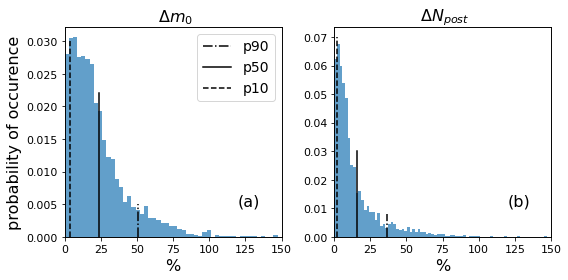

In [16]:
# plot Fig 7 got PDF of the deviations 
fig, axs = plt.subplots(ncols = 2, figsize=(8, 4),tight_layout=True)
fs = 16

axs[0].hist(deltaM,number_of_bins_FD(deltaM),density=True,alpha = 0.7)
axs[1].hist(deltaNpost,number_of_bins_FD(deltaNpost),density=True,alpha =0.7)


axs[0].set_title(' $\Delta m_{0}$', fontsize=fs)
axs[1].set_title(' $\Delta N_{post}$', fontsize=fs)



axs[0].plot([np.percentile(deltaM,90),np.percentile(deltaM,90)],[0,0.005],color='black',ls = '-.',label = 'p90')
axs[1].plot([np.percentile(deltaNpost,90),np.percentile(deltaNpost,90)],[0,0.008],color='black',ls = '-.')

axs[0].plot([np.mean(deltaM),np.mean(deltaM)],[0,0.022],color='black',label = 'p50')
axs[1].plot([np.mean(deltaNpost),np.mean(deltaNpost)],[0,0.03],color='black')

axs[0].plot([np.percentile(deltaM,10),np.percentile(deltaM,10)],[0,0.03],color='black',ls = '--', label = 'p10')
axs[1].plot([np.percentile(deltaNpost,10),np.percentile(deltaNpost,10)],[0,0.07],color='black',ls = '--')
for ax in axs:
    ax.xaxis.set_tick_params(labelsize=fs-5)
    ax.yaxis.set_tick_params(labelsize=fs-5)
    ax.set_xlabel('%',fontsize=fs)
    ax.set_xlim(0,150)
axs[0].set_ylabel('probability of occurence',fontsize=fs)
axs[0].legend(loc = 'upper right', fontsize = fs-2)

x1= ['','']
ax1_names= ['(a)','(b)']
for i in range(0,2):
    ax1[i]=axs[i].twiny()
    ax1[i].set_xlabel(ax1_names[i],fontsize = fs)
    ax1[i].set_xticks([])
    ax1[i].xaxis.set_label_coords(0.85,0.15)

plt.savefig('output/f07.png',bbox_inches='tight',dpi=300)
plt.show()

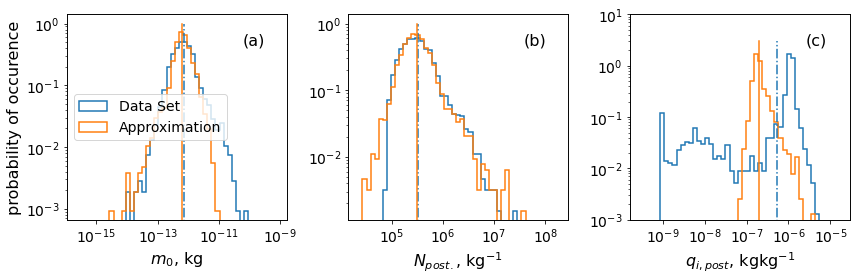

In [19]:
# plot Fig 8 for PDFs of m0, Npost, qi predictions

fig, axs = plt.subplots(ncols = 3, figsize=(12,4),tight_layout=True)
fs = 16
# plt.ylim(0,100)
axs[1].hist(np.log(Npost_joined_test),np.linspace(10, 19, 50),density = True,histtype='step',linewidth=1.5)
axs[1].hist(np.log(n_post_test),np.linspace(10, 19, 50),density = True,histtype='step',linewidth=1.5)

bins = np.linspace(-36, -21, 50)
axs[0].hist(np.log(Mreal_joined_test),bins,density = True,histtype='step',linewidth=1.5,label = 'Data Set')
axs[0].hist(np.log(simple_test),bins, density=True,histtype='step',linewidth=1.5, label = 'Approximation')
Qi0_fs_test = np.where(Qi0_fs_test[:]>1e-9,Qi0_fs_test[:],1e-9)
axs[2].hist(np.log(Qi0_fs_test),np.linspace(-22, -11, 50),density = True,histtype='step',linewidth=1.5)
axs[2].hist(np.log(simple_test*n_post_test) ,np.linspace(-22,-11, 50),density = True,histtype='step',linewidth=1.5)

axs[1].set_xlabel(r'$N_{post.}$, kg$^{-1}$',fontsize = fs)
axs[0].set_xlabel(r'$m_0$, kg',fontsize = fs)
axs[2].set_xlabel(r'$q_{i, post}$, kgkg$^{-1}$',fontsize = fs)


ticksNpost = np.array([1e-15, 1e-13,  1e-11, 1e-9])
ticksNs = (["$10^{-15}$", "$10^{-13}$",  "$10^{-11}$","$10^{-9}$"])
axs[0].set_xticks(np.log(ticksNpost), ticksNs,
       rotation=0)


ticksNpost = np.array([1e4, 1e5, 1e6, 1e7, 1e8])
ticksNs = (["$10^{4}$","$10^{5}$", "$10^{6}$", "$10^{7}$", "$10^{8}$"])
axs[1].set_xticks(np.log(ticksNpost), ticksNs,
       rotation=0)

ticksNpost = np.array([1e-9,1e-8, 1e-7, 1e-6, 1e-5])
ticksNs = (["$10^{-9}$","$10^{-8}$", "$10^{-7}$", "$10^{-6}$","$10^{-5}$"])
axs[2].set_xticks(np.log(ticksNpost), ticksNs,
       rotation=0)

axs[1].plot([np.mean(np.log(Npost_joined_test)),np.mean(np.log(Npost_joined_test))],[0,1],color='C0',ls = '-.',label = 'p50')
axs[1].plot([np.mean(np.log(n_post_test)),np.mean(np.log(n_post_test))],[0,1],color='tab:orange',ls = '-',label = 'p50')

axs[0].plot([np.mean(np.log(Mreal_joined_test)),np.mean(np.log(Mreal_joined_test))],[0,1],color='C0',ls = '-.')
axs[2].plot([np.mean(np.log(Qi0_fs_test)),np.mean(np.log(Qi0_fs_test))],[0,3],color='C0',ls = '-.',label = 'p50')

axs[0].plot([np.mean(np.log(simple_test)),np.mean(np.log(simple_test))],[0,1],color='tab:orange',ls = '-')
axs[2].plot([np.mean(np.log(simple_test*n_post_test)),np.mean(np.log(simple_test*n_post_test))],[0,3],color='tab:orange',ls = '-',label = 'p50')


for ax in axs:
    ax.xaxis.set_tick_params(labelsize=fs-2)
    ax.yaxis.set_tick_params(labelsize=fs-2)
    ax.set_yscale("log")

axs[0].set_ylabel('probability of occurence',fontsize=fs)
axs[0].legend(loc = 'center left',fontsize = fs-2)
axs[2].set_ylim(1e-3,1e1)

ax1= ['','','']
ax1_names= ['(a)','(b)','(c)']
for i in range(0,3):
    ax1[i]=axs[i].twiny()
    ax1[i].set_xlabel(ax1_names[i],fontsize = fs)
    ax1[i].set_xticks([])
    ax1[i].xaxis.set_label_coords(0.85,0.85)
plt.savefig('output/f08.png',bbox_inches='tight',dpi=300)
plt.show()

In [50]:
#Figures 13-16 for different time steps 
#load the data set:
d = [] 
d = loadtxt(data_path+"VM_dataset_out_dataset_6GWw00_fs.dat",unpack = True)
ngw =6
Mreal_fs = (d[3+3*ngw+4,:])
Ninit_fs = (d[0,:])
Npost_fs= (d[3+3*ngw+2,:])
Ft0_fs= (d[3+3*ngw+1,:])
Qi_post_fs =d[3+3*ngw+6,:]
N_case_fs  =d[3+3*ngw+7,:]
d = [] 
d = loadtxt(data_path+"VM_dataset_out_dataset_6GWw00_par1.dat",unpack = True)
ngw =6
Mreal_param1 = (d[3+3*ngw+4,:])
Ninit_param1 = ( d[0,:])
Npost_param1= (d[3+3*ngw+2,:])
Ft0_param1= (d[3+3*ngw+1,:])
Qi_post_param1 =d[3+3*ngw+6,:]
N_case_param1 =d[3+3*ngw+7,:]
d = [] 
d = loadtxt(data_path+"VM_dataset_out_dataset_6GWw00_par30.dat",unpack = True)
ngw =6
Mreal_param10 = (d[3+3*ngw+4,:])
Ninit_param10 = ( d[0,:])
Npost_param10= (d[3+3*ngw+2,:])
Ft0_param10= (d[3+3*ngw+1,:])
Qi_post_param10 =d[3+3*ngw+6,:]
N_case_param10 =d[3+3*ngw+7,:]
d = [] 
d = loadtxt(data_path+"VM_dataset_out_dataset_6GWw00_par60.dat",unpack = True)
ngw =6
Mreal_param60 = (d[3+3*ngw+4,:])
Ninit_param60 = ( d[0,:])
Npost_param60= (d[3+3*ngw+2,:])
Ft0_param60= (d[3+3*ngw+1,:])
Qi_post_param60 =d[3+3*ngw+6,:]
N_case_param60 =d[3+3*ngw+7,:]

d = [] 
d = loadtxt(data_path+"VM_dataset_out_dataset_6GWw00_par120.dat",unpack = True)
ngw =6
Mreal_param120 = (d[3+3*ngw+4,:])
Ninit_param120 = ( d[0,:])
Npost_param120= (d[3+3*ngw+2,:])
Ft0_param120= (d[3+3*ngw+1,:])
Qi_post_param120 =d[3+3*ngw+6,:]
N_case_param120 =d[3+3*ngw+7,:]
d = [] 
d = loadtxt(data_path+"VM_dataset_out_dataset_6GWw00_par240.dat",unpack = True)
ngw =6
Mreal_param240 = (d[3+3*ngw+4,:])
Ninit_param240 = ( d[0,:])
Npost_param240= (d[3+3*ngw+2,:])
Ft0_param240= (d[3+3*ngw+1,:])
Qi_post_param240 =d[3+3*ngw+6,:]
N_case_param240 =d[3+3*ngw+7,:]

simple_test = new_simple_fit_13(Ninit_fs, Ft0_fs)
n_post_test = N_post_check(Ninit_fs, Ft0_fs,simple_test)

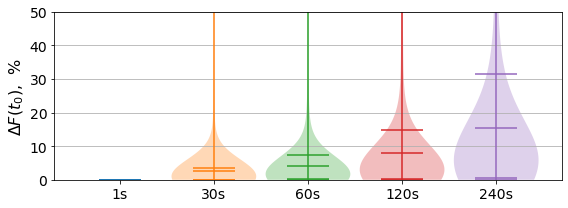

In [51]:
# plot Fig. 9
# calculate differences
difFt01 = difference_in_2(Ft0_param1,Ft0_fs,N_case_param1, N_case_fs)
difFt010 = difference_in_2(Ft0_param10,Ft0_fs,N_case_param10, N_case_fs)
difFt060 = difference_in_2(Ft0_param60,Ft0_fs,N_case_param60, N_case_fs)
difFt0120 = difference_in_2(Ft0_param120,Ft0_fs,N_case_param120, N_case_fs)
difFt0240 = difference_in_2(Ft0_param240,Ft0_fs,N_case_param240, N_case_fs)
# plot
fig, axs = plt.subplots( figsize=(8,3),tight_layout=True)
fs = 16
axs.set_ylim(0,50)
axs.set_ylabel('$\Delta F(t_0)$,  %',fontsize=fs)
axs.xaxis.set_tick_params(labelsize=fs-2)
axs.yaxis.set_tick_params(labelsize=fs-2)
axs.violinplot(difFt01, [1], points=10000, widths=0.9,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])

axs.violinplot(difFt010, [2], points = 10000,widths=0.9,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])

axs.violinplot(difFt060, [3], points = 10000,widths=0.9,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])
axs.violinplot(difFt0120, [4], points = 10000,widths=0.9,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])
axs.violinplot(difFt0240, [5], points = 10000,widths=0.9,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])
axs.set_xticks([1,2,3,4,5],["1s", "30s", "60s", "120s", "240s"])
axs.grid(visible=None, which='major', axis='y')
plt.savefig('output/f09.png',bbox_inches='tight',dpi=300)
plt.show()


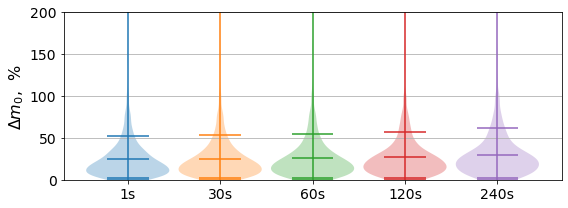

In [23]:
# plot Fig 10
# calculate differences
difmt01 = difference_in_2(Mreal_param1,Mreal_fs,N_case_param1, N_case_fs)
difmt010 = difference_in_2(Mreal_param10,Mreal_fs,N_case_param10, N_case_fs)
difmt060 = difference_in_2(Mreal_param60,Mreal_fs,N_case_param60, N_case_fs)
difmt0120 = difference_in_2(Mreal_param120,Mreal_fs,N_case_param120, N_case_fs)
difmt0240 = difference_in_2(Mreal_param240,Mreal_fs,N_case_param240, N_case_fs)

# plot
fig, axs = plt.subplots( figsize=(8,3),tight_layout=True)
fs = 16
axs.set_ylabel('$\Delta m_0$,  %',fontsize=fs)
axs.xaxis.set_tick_params(labelsize=fs-2)
axs.yaxis.set_tick_params(labelsize=fs-2)
axs.set_ylim(0,200)

axs.violinplot(difmt01, [1], points=10000, widths=0.9,
                     showmeans=True, showextrema=True,quantiles=[0.05, 0.9])

axs.violinplot(difmt010, [2], points = 10000,widths=0.9,
                     showmeans=True, showextrema=True,quantiles=[0.05, 0.9])

axs.violinplot(difmt060, [3], points = 10000,widths=0.9,
                     showmeans=True, showextrema=True,quantiles=[0.05, 0.9])
axs.violinplot(difmt0120, [4], points = 10000,widths=0.9,
                     showmeans=True, showextrema=True,quantiles=[0.05, 0.9])
axs.violinplot(difmt0240, [5], points = 10000,widths=0.9,
                     showmeans=True, showextrema=True,quantiles=[0.05, 0.9])

axs.set_xticks([1,2,3,4,5],["1s", "30s", "60s", "120s", "240s"])
axs.grid(visible=None, which='major', axis='y')
plt.savefig('output/f10.png',bbox_inches='tight',dpi=300)
plt.show()

5098.023217876413


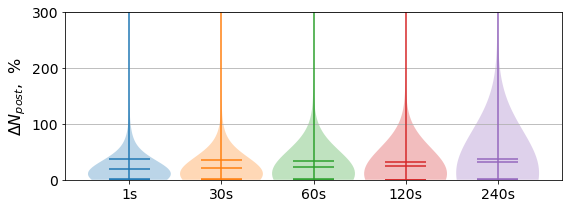

In [24]:
# plot Fig 11
difnt01 = difference_in_2(Npost_param1,Npost_fs,N_case_param1, N_case_fs)
difnt010 = difference_in_2(Npost_param10,Npost_fs,N_case_param10, N_case_fs)
difnt060 = np.array(difference_in_2(Npost_param60,Npost_fs,N_case_param60, N_case_fs))
difnt0120 =np.array( difference_in_2(Npost_param120,Npost_fs,N_case_param120, N_case_fs))
difnt0240 = np.array(difference_in_2(Npost_param240,Npost_fs,N_case_param240, N_case_fs))
print("Maximum difference in number concentration for dt+120 s : ", max(difnt0120))

difnt0240 = np.where(difnt0240[:]<5000,difnt0240[:],5098)

fig, axs = plt.subplots( figsize=(8, 3),tight_layout=True)
fs = 16
axs.set_ylim(0,300)
axs.set_ylabel('$\Delta N_{post}$,  %',fontsize=fs)
axs.xaxis.set_tick_params(labelsize=fs-2)
axs.yaxis.set_tick_params(labelsize=fs-2)
axs.violinplot(difnt01, [1], points=len(difnt01), widths=0.9,
                     showmeans=True, showextrema=True,quantiles=[0.05, 0.9])

axs.violinplot(difnt010, [2], points = len(difnt010),widths=0.9,
                     showmeans=True, showextrema=True,quantiles=[0.05, 0.9])

axs.violinplot(difnt060, [3], points = len(difnt060),widths=0.9,
                     showmeans=True, showextrema=True,quantiles=[0.05, 0.9])
axs.violinplot(difnt0120, [4], points = len(difnt0120),widths=0.9,
                     showmeans=True, showextrema=True,quantiles=[0.05, 0.9])
axs.violinplot(difnt0240, [5], points = len(difnt0240),widths=0.9,
                     showmeans=True, showextrema=True,quantiles=[0.05, 0.9])
axs.set_xticks([1,2,3,4,5],["1s", "30s", "60s", "120s", "240s"])
axs.grid(visible=None, which='major', axis='y')
plt.savefig('output/f11.png',bbox_inches='tight',dpi=300)
plt.show()

/tmp/ipykernel_33470/3981036428.py:119: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('output_draft_plots/PDF_different_dt_hist_new.png',bbox_inches='tight',dpi=300)
/home/administrator/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


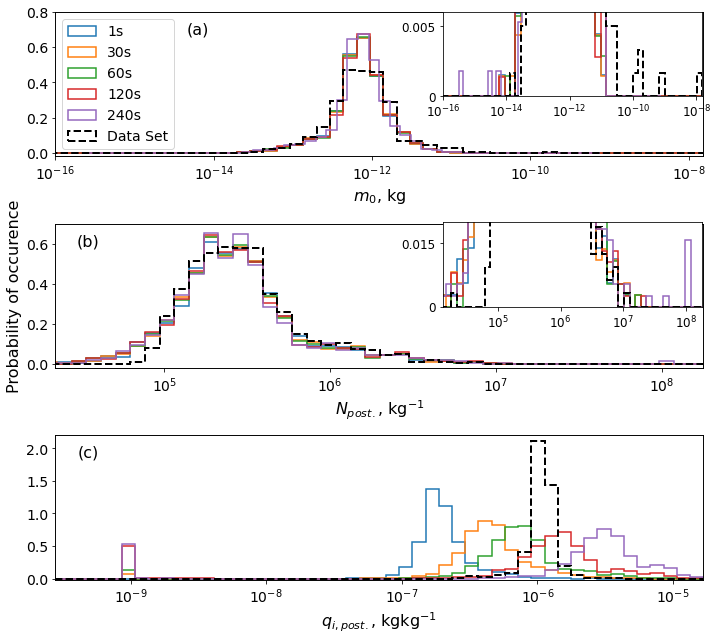

In [62]:
#histogram plot
fig, axs = plt.subplots(nrows = 3, figsize=(10,9),tight_layout=True)
fs = 16

ax1= ['','','']
ax1_names= ['(a)','(b)','(c)']
for i in range(1,3):
    ax1[i]=axs[i].twiny()
    ax1[i].set_xlabel(ax1_names[i],fontsize = fs)
    ax1[i].set_xticks([])
    ax1[i].xaxis.set_label_coords(0.05,0.85)
ax1[0]=axs[0].twiny()
ax1[0].set_xlabel(ax1_names[0],fontsize = fs)
ax1[0].set_xticks([])
ax1[0].xaxis.set_label_coords(0.22,0.85)

ax_inset2 = fig.add_axes([0.62, 0.52, 0.36, 0.13]) 
ticksNpost = np.array([1e4, 1e5, 1e6, 1e7, 1e8])
ticksNs = (["$10^{4}$","$10^{5}$", "$10^{6}$", "$10^{7}$", "$10^{8}$"])
axs[1].set_xticks(np.log(ticksNpost), ticksNs,
       rotation=0)
ax_inset2.set_xticks(np.log(ticksNpost), ticksNs,
       rotation=0)

ticksNpost = np.array([1e-9,1e-8, 1e-7, 1e-6, 1e-5, 1e-4])
ticksNs = (["$10^{-9}$","$10^{-8}$", "$10^{-7}$", "$10^{-6}$","$10^{-5}$","$10^{-4}$"])
axs[2].set_xticks(np.log(ticksNpost), ticksNs,
       rotation=0)
axs[0].set_xlabel(r'$m_{0}$, kg',fontsize = fs)


axs[1].hist(np.log(Npost_param1),np.linspace(9, 19, 50),density=True,histtype='step',linewidth=1.5,label='1s',ls = '-')
axs[1].hist(np.log(Npost_param10),np.linspace(9, 19, 50),density=True,histtype='step',linewidth=1.5,label='1s',ls = '-')
axs[1].hist(np.log(Npost_param60),np.linspace(9, 19, 50),density=True,histtype='step',linewidth=1.5,label='1s',ls = '-')
axs[1].hist(np.log(Npost_param120),np.linspace(9, 19, 50), density=True,histtype='step',linewidth=1.5,label='1s',ls = '-')
axs[1].hist(np.log( np.where(Npost_param240[:]<1e8,Npost_param240[:],1e8)),np.linspace(9, 19, 50), density=True,histtype='step',linewidth=1.5,label='1s',ls = '-')
axs[1].set_xlabel(r'$N_{post.}$, kg$^{-1}$',fontsize = fs)
parts=axs[1].hist(np.log(Npost_fs),np.linspace(9, 19, 50),density=True,histtype='step',linewidth=2,label='1s',color = 'black',ls = '--')
axs[2].set_xlabel(r'$q_{i, post.}$, kgkg$^{-1}$',fontsize = fs)


axs[0].hist(np.log(Mreal_param1),np.linspace(-37, -18, 50),density=True,histtype='step',linewidth=1.5,label='1s')
axs[0].hist(np.log(Mreal_param10),np.linspace(-37, -18, 50),density=True,histtype='step',linewidth=1.5,label='30s')
axs[0].hist(np.log(Mreal_param60),np.linspace(-37, -18, 50),density=True,histtype='step',linewidth=1.5,label='60s')
axs[0].hist(np.log(Mreal_param120),np.linspace(-37, -18, 50),density=True,histtype='step',linewidth=1.5,label='120s')
axs[0].hist(np.log(np.where(Mreal_param240[:]>1e-16,Mreal_param240[:],1e-16)),np.linspace(-36, -21, 50),density=True,histtype='step',linewidth=1.5,label='240s')
axs[0].hist(np.log(Mreal_fs),np.linspace(-37, -18, 50),density=True,histtype='step',linewidth=2,label='Data Set',color = 'black',ls = '--')
axs[0].legend(loc='upper left', fontsize = fs-2)


axs[2].hist(np.log(Qi_post_param1), np.linspace(-22, -11, 50),density=True,histtype='step',linewidth=1.5,label='1s')
q10 = np.where(Qi_post_param10[:]<1e-4,Qi_post_param10[:],1e-4)
q10 = np.where(q10[:]>1e-9,q10[:],1e-9)

q60 = np.where(Qi_post_param60[:]<1e-4,Qi_post_param60[:],1e-4)
q60 = np.where(q60[:]>1e-9,q60[:],1e-9)
axs[2].hist(np.log(q10), np.linspace(-22, -11, 50),density=True,histtype='step',linewidth=1.5,label='1s')


axs[2].hist(np.log(q60), np.linspace(-22, -11, 50),density=True,histtype='step',linewidth=1.5,label='1s')

q120 = np.where(Qi_post_param120[:]<1e-4,Qi_post_param120[:],1e-4)
q120 = np.where(q120[:]>1e-9,q120[:],1e-9)
axs[2].hist(np.log(q120), np.linspace(-22, -11, 50),density=True,histtype='step',linewidth=1.5,label='1s')

q240 = np.where(Qi_post_param240[:]<1e-4,Qi_post_param240[:],1e-4)
q240 = np.where(q240[:]>1e-9,q240[:],1e-9)
axs[2].hist(np.log(q240), np.linspace(-22, -11, 50),density=True,histtype='step',linewidth=1.5,label='1s')
axs[2].hist(np.log(Qi_post_fs),np.linspace(-22, -11, 50),density=True,histtype='step',linewidth=2,label='1s',color = 'black',ls = '--')
for ax in axs:
    ax.xaxis.set_tick_params(labelsize=fs-2)
    ax.yaxis.set_tick_params(labelsize=fs-2)

axs[1].set_ylabel('Probability of occurence',fontsize =fs)
axs[0].set_ylim(-0.02,0.8)
axs[1].set_ylim(-0.02,0.7)
axs[2].set_ylim(-0.02,2.2)

ax_inset = fig.add_axes([0.62, 0.845, 0.36, 0.13])  # [left, bottom, width, height]
ax_inset.set_ylim(0,0.006)
ax_inset.set_xlim(-36, -18)
ax_inset.hist(np.log(Mreal_param1),np.linspace(-37, -18, 50),density=True,histtype='step',linewidth=1.5,label='1s')
ax_inset.hist(np.log(Mreal_param10),np.linspace(-37, -18, 50),density=True,histtype='step',linewidth=1.5,label='30s')
ax_inset.hist(np.log(Mreal_param60),np.linspace(-37, -18, 50),density=True,histtype='step',linewidth=1.5,label='60s')
ax_inset.hist(np.log(Mreal_param120),np.linspace(-37, -18, 50),density=True,histtype='step',linewidth=1.5,label='120s')
ax_inset.hist(np.log(np.where(Mreal_param240[:]>1e-16,Mreal_param240[:],1e-16)),np.linspace(-36, -21, 50),density=True,histtype='step',linewidth=1.5,label='240s')
ax_inset.hist(np.log(Mreal_fs),np.linspace(-37, -18, 50),density=True,histtype='step',linewidth=2,label='Data Set',color = 'black',ls = '--')


axs[0].set_xlim(-36, -18)
axs[1].set_xlim(10,19)
axs[2].set_xlim(-22,-11)
ticksNpost = np.array([1e-16, 1e-14, 1e-12, 1e-10, 1e-8])
ticksNs = (["$10^{-16}$", "$10^{-14}$", "$10^{-12}$", "$10^{-10}$", "$10^{-8}$"])
axs[0].set_xticks(np.log(ticksNpost), ticksNs,
       rotation=0)
ax_inset.set_xticks(np.log(ticksNpost), ticksNs,
       rotation=0)
ax_inset.xaxis.set_tick_params(labelsize=fs-4)
ax_inset.yaxis.set_tick_params(labelsize=fs-4)
ax_inset.set_yticks([0,0.005], ['0','0.005'],
       rotation=0)


ax_inset2.hist(np.log(Npost_param1),np.linspace(9, 19, 50),density=True,histtype='step',linewidth=1.5,label='1s',ls = '-')
ax_inset2.hist(np.log(Npost_param10),np.linspace(9, 19, 50),density=True,histtype='step',linewidth=1.5,label='1s',ls = '-')
ax_inset2.hist(np.log(Npost_param60),np.linspace(9, 19, 50),density=True,histtype='step',linewidth=1.5,label='1s',ls = '-')
ax_inset2.hist(np.log(Npost_param120),np.linspace(9, 19, 50), density=True,histtype='step',linewidth=1.5,label='1s',ls = '-')
ax_inset2.hist(np.log( np.where(Npost_param240[:]<1e8,Npost_param240[:],1e8)),np.linspace(9, 19, 50), density=True,histtype='step',linewidth=1.5,label='1s',ls = '-')
parts=ax_inset2.hist(np.log(Npost_fs),np.linspace(9, 19, 50),density=True,histtype='step',linewidth=2,label='1s',color = 'black',ls = '--')
ax_inset2.set_xlim(9.5,19)
ax_inset2.set_ylim(0,0.02)
ax_inset2.set_yticks([0,0.015], ['0','0.015'],
       rotation=0)
ax_inset2.xaxis.set_tick_params(labelsize=fs-4)
ax_inset2.yaxis.set_tick_params(labelsize=fs-4)


plt.savefig('output/f12.png',bbox_inches='tight',dpi=300)
plt.show()

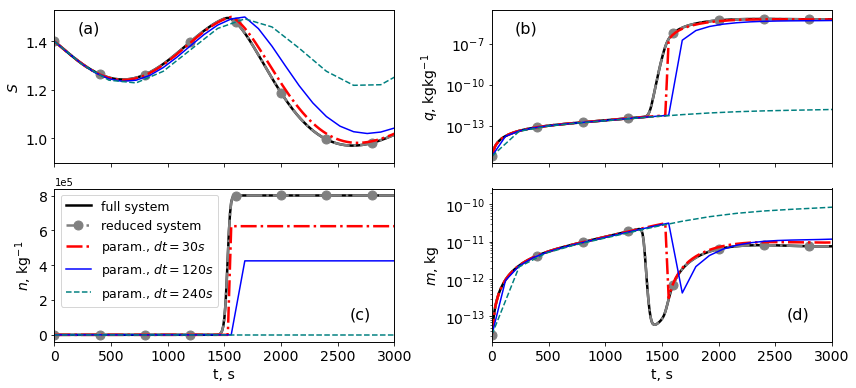

In [70]:
#Figures 13, 14 for 2 separate cases

test_rs=read_data_dat(data_path+'VM_specific_out_fs_verif3.dat')
test_ft_1gw_new=read_data_dat('VM_specific_out_fs_verif3.dat')


test_param_1 = read_data_dat(data_path+'VM_specific_out_par1_verif3.dat')
test_param_30 = read_data_dat(data_path+'VM_specific_out_par30_verif3.dat')
test_param_60 = read_data_dat(data_path+'VM_specific_out_par60_verif3.dat')
test_param_120 = read_data_dat(data_path+'VM_specific_out_par120_verif3.dat')
test_param_240 = read_data_dat(data_path+'VM_specific_out_red240_verif3.dat')
xmax = 3000
xmin=0

fig, ax = plt.subplots(ncols = 2,nrows = 2,figsize=(12, 5.5),tight_layout=True)
for axs in ax.flat:
    axs.set_xlim(xmin,xmax)
    axs.xaxis.set_tick_params(labelsize=fs-2)
    axs.yaxis.set_tick_params(labelsize=fs-2)
ax[1,0].set_xlabel('t, s',fontsize = 14)
ax[1,1].set_xlabel('t, s',fontsize = 14)
ax[1,0].ticklabel_format(style='sci', axis='y', scilimits=(0,2))
ax[0,0].plot(np.array(test_ft_1gw_new[0][:]), np.array(test_ft_1gw_new[2][:]), color='black',linestyle ='-', linewidth=2.5, label='full system')
ax[0,0].plot(np.array(test_rs[0][:]), np.array(test_rs[2][:]), color='gray',linestyle ='-.', linewidth=2.5, marker = "o",markevery = 40,markersize = 9,label='reduced system')
ax[0,0].plot(np.array(test_param_30[0][:]), np.array(test_param_30[2][:]), color='red',linestyle ='-.', linewidth=2.5, label='param., $dt = 30s$')
ax[0,0].plot(np.array(test_param_120[0][:]), np.array(test_param_120[2][:]), color='blue',linestyle ='-', linewidth=1.5, label='param., $dt = 120s$')
ax[0,0].plot(np.array(test_param_240[0][:]), np.array(test_param_240[2][:]), color='teal',linestyle ='--', linewidth=1.5, label='param., $dt = 240s$')
ax[0,0].set_ylabel('$S$',fontsize = 14)


ax[1,0].plot(np.array(test_ft_1gw_new[0][:]), np.array(test_ft_1gw_new[1][:]), color='black',linestyle ='-', linewidth=2.5, label='full system')
ax[1,0].plot(np.array(test_rs[0][:]), np.array(test_rs[1][:]), color='gray',linestyle ='-.', linewidth=2.5, marker = "o",markevery = 40,markersize = 9,label='reduced system')
ax[1,0].plot(np.array(test_param_30[0][:]), np.array(test_param_30[1][:]), color='red',linestyle ='-.', linewidth=2.5, label='param., $dt = 30s$')
ax[1,0].plot(np.array(test_param_120[0][:]), np.array(test_param_120[1][:]), color='blue',linestyle ='-', linewidth=1.5, label='param., $dt = 120s$')
ax[1,0].plot(np.array(test_param_240[0][:]), np.array(test_param_240[1][:]), color='teal',linestyle ='--', linewidth=1.5, label='param., $dt = 240s$')
ax[1,0].set_ylabel('$n$, kg$^{-1}$',fontsize = 14)

ax[0,1].plot(np.array(test_ft_1gw_new[0][:]), np.array(test_ft_1gw_new[3][:]), color='black',linestyle ='-', linewidth=2.5, label='reduced system')
ax[0,1].plot(np.array(test_rs[0][:]), np.array(test_rs[3][:]), color='gray',linestyle ='-.', linewidth=2.5, marker = "o",markevery = 40,markersize = 9,label='reduced system')
ax[0,1].plot(np.array(test_param_30[0][:]), np.array(test_param_30[3][:]), color='red',linestyle ='-.', linewidth=2.5, label='param., $dt = 30s$')
ax[0,1].plot(np.array(test_param_120[0][:]), np.array(test_param_120[3][:]), color='blue',linestyle ='-', linewidth=1.5, label='param., $dt = 120s$')
ax[0,1].plot(np.array(test_param_240[0][:]), np.array(test_param_240[3][:]), color='teal',linestyle ='--', linewidth=1.5, label='param., $dt = 240s$')
ax[0,1].set_yscale("log")
ax[0,1].set_ylabel('$q$, kgkg$^{-1}$',fontsize = 14)
ax[1,1].plot(np.array(test_ft_1gw_new[0][:]), np.array(test_ft_1gw_new[3][:])/ np.array(test_ft_1gw_new[1][:]), color='black',linestyle ='-', linewidth=2.5, label='full system solution')
ax[1,1].plot(np.array(test_rs[0][:]), np.array(test_rs[3][:])/np.array(test_rs[1][:]), color='gray',linestyle ='-.', linewidth=2.5, marker = "o",markevery = 40,markersize = 9,label='reduced system')
ax[1,1].plot(np.array(test_param_30[0][:]), np.array(test_param_30[3][:])/np.array(test_param_30[1][:]), color='red',linestyle ='-.', linewidth=2.5, label='param., $dt = 30s$')
ax[1,1].plot(np.array(test_param_120[0][:]), np.array(test_param_120[3][:])/np.array(test_param_120[1][:]), color='blue',linestyle ='-', linewidth=1.5, label='param., $dt = 120s$')
ax[1,1].plot(np.array(test_param_240[0][:]), np.array(test_param_240[3][:])/np.array(test_param_240[1][:]), color='teal',linestyle ='--', linewidth=1.5, label='param., $dt = 240s$')
ax[1,1].set_yscale("log")
ax[1,1].set_ylabel('$m$, kg',fontsize = 14)
ax[0,0].set_xticklabels(labels=[])
ax[0,1].set_xticklabels(labels=[])
ax[1,0].legend(loc='upper left', fontsize=fs-3.5)

ax1= ['','','','']
ax1_names= ['(a)','(b)','(c)','(d)']
for i in range(0,2):
    ax1[i]=ax[0][i].twiny()
    ax1[i].set_xlabel(ax1_names[i],fontsize = fs)
    ax1[i].set_xticks([])
    ax1[i].xaxis.set_label_coords(0.1,0.85)
for i in range(2,4):
    ax1[i]=ax[1,i-2].twiny()
    ax1[i].set_xlabel(ax1_names[i],fontsize = fs)
    ax1[i].set_xticks([])
    ax1[i].xaxis.set_label_coords(0.90,0.15)
    
    

plt.savefig('output/f14.png',bbox_inches='tight',dpi=300)
plt.show()

In [71]:
test_rs=read_data_dat('../partcel_mod_dat/VM_specific_out_red_verif2.dat')
test_ft_1gw_new=read_data_dat('../partcel_mod_dat/VM_specific_out_fs_verif2.dat')

test_param_30 = read_data_dat('../partcel_mod_dat/VM_specific_out_par30_verif2.dat')
test_param_60 = read_data_dat('../partcel_mod_dat/VM_specific_out_par60_verif2.dat')
test_param_120 = read_data_dat('../partcel_mod_dat/VM_specific_out_par120_verif2.dat')
test_param_240 = read_data_dat('../partcel_mod_dat/VM_specific_out_par240_verif2.dat')
xmax = 4500

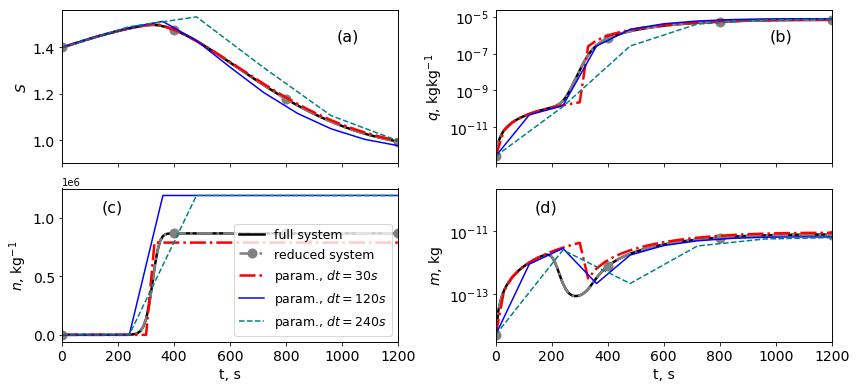

In [72]:
xmax = 1200
xmin = 0
fig, ax = plt.subplots(ncols = 2,nrows = 2,figsize=(12, 5.5),tight_layout=True)
for axs in ax.flat:
    axs.set_xlim(xmin,xmax)
    
    axs.xaxis.set_tick_params(labelsize=fs-2)
    axs.yaxis.set_tick_params(labelsize=fs-2)
ax[1,0].set_xlabel('t, s',fontsize = 14)
ax[1,1].set_xlabel('t, s',fontsize = 14)
ax[1,0].ticklabel_format(style='sci', axis='y', scilimits=(0,2))
ax[0,0].plot(np.array(test_ft_1gw_new[0][:]), np.array(test_ft_1gw_new[2][:]), color='black',linestyle ='-', linewidth=2.5, label='full system')
ax[0,0].plot(np.array(test_rs[0][:]), np.array(test_rs[2][:]), color='gray',linestyle ='-.', linewidth=2.5, marker = "o",markevery = 40,markersize = 9,label='reduced system')
ax[0,0].plot(np.array(test_param_30[0][:]), np.array(test_param_30[2][:]), color='red',linestyle ='-.', linewidth=2.5, label='param., $dt = 30s$')
ax[0,0].plot(np.array(test_param_120[0][:]), np.array(test_param_120[2][:]), color='blue',linestyle ='-', linewidth=1.5, label='param., $dt = 120s$')
ax[0,0].plot(np.array(test_param_240[0][:]), np.array(test_param_240[2][:]), color='teal',linestyle ='--', linewidth=1.5, label='param., $dt = 240s$')
ax[0,0].set_ylabel('$S$',fontsize = 14)

ax[1,0].plot(np.array(test_ft_1gw_new[0][:]), np.array(test_ft_1gw_new[1][:]), color='black',linestyle ='-', linewidth=2.5, label='full system')
ax[1,0].plot(np.array(test_rs[0][:]), np.array(test_rs[1][:]), color='gray',linestyle ='-.', linewidth=2.5, marker = "o",markevery = 40,markersize = 9,label='reduced system')
ax[1,0].plot(np.array(test_param_30[0][:]), np.array(test_param_30[1][:]), color='red',linestyle ='-.', linewidth=2.5, label='param., $dt = 30s$')
ax[1,0].plot(np.array(test_param_120[0][:]), np.array(test_param_120[1][:]), color='blue',linestyle ='-', linewidth=1.5, label='param., $dt = 120s$')
ax[1,0].plot(np.array(test_param_240[0][:]), np.array(test_param_240[1][:]), color='teal',linestyle ='--', linewidth=1.5, label='param., $dt = 240s$')
ax[1,0].set_ylabel('$n$, kg$^{-1}$',fontsize = 14)
ax[0,1].plot(np.array(test_ft_1gw_new[0][:]), np.array(test_ft_1gw_new[3][:]), color='black',linestyle ='-', linewidth=2.5, label='reduced system')
ax[0,1].plot(np.array(test_rs[0][:]), np.array(test_rs[3][:]), color='gray',linestyle ='-.', linewidth=2.5, marker = "o",markevery = 40,markersize = 9,label='reduced system')
ax[0,1].plot(np.array(test_param_30[0][:]), np.array(test_param_30[3][:]), color='red',linestyle ='-.', linewidth=2.5, label='param., $dt = 30s$')
ax[0,1].plot(np.array(test_param_120[0][:]), np.array(test_param_120[3][:]), color='blue',linestyle ='-', linewidth=1.5, label='param., $dt = 120s$')
ax[0,1].plot(np.array(test_param_240[0][:]), np.array(test_param_240[3][:]), color='teal',linestyle ='--', linewidth=1.5, label='param., $dt = 240s$')
ax[0,1].set_yscale("log")

ax[0,1].set_ylabel('$q$, kgkg$^{-1}$',fontsize = 14)

ax[1,1].plot(np.array(test_ft_1gw_new[0][:]), np.array(test_ft_1gw_new[3][:])/ np.array(test_ft_1gw_new[1][:]), color='black',linestyle ='-', linewidth=2.5, label='full system solution')
ax[1,1].plot(np.array(test_rs[0][:]), np.array(test_rs[3][:])/np.array(test_rs[1][:]), color='gray',linestyle ='-.', linewidth=2.5, marker = "o",markevery = 40,markersize = 9,label='reduced system')
ax[1,1].plot(np.array(test_param_30[0][:]), np.array(test_param_30[3][:])/np.array(test_param_30[1][:]), color='red',linestyle ='-.', linewidth=2.5, label='param., $dt = 30s$')
ax[1,1].plot(np.array(test_param_120[0][:]), np.array(test_param_120[3][:])/np.array(test_param_120[1][:]), color='blue',linestyle ='-', linewidth=1.5, label='param., $dt = 120s$')
ax[1,1].plot(np.array(test_param_240[0][:]), np.array(test_param_240[3][:])/np.array(test_param_240[1][:]), color='teal',linestyle ='--', linewidth=1.5, label='param., $dt = 240s$')
ax[1,1].set_yscale("log")
ax[1,1].set_ylabel('$m$, kg',fontsize = 14)
ax[0,0].set_xticklabels(labels=[])
ax[0,1].set_xticklabels(labels=[])
ax1= ['','','','']
ax1_names= ['(a)','(b)','(c)','(d)']
for i in range(0,2):
    ax1[i]=ax[0][i].twiny()
    ax1[i].set_xlabel(ax1_names[i],fontsize = fs)
    ax1[i].set_xticks([])
    ax1[i].xaxis.set_label_coords(0.85,0.8)
for i in range(2,4):
    ax1[i]=ax[1][i-2].twiny()
    ax1[i].set_xlabel(ax1_names[i],fontsize = fs)
    ax1[i].set_xticks([])
    ax1[i].xaxis.set_label_coords(0.15,0.85)
    
    

ax[1,0].legend(loc='lower right', fontsize=fs-3.5)

plt.savefig('output/f13.png',bbox_inches='tight',dpi=300)
plt.show()